In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.model_selection import train_test_split
sb.set() # set the default Seaborn style for graphics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder #imported all for testing
from sklearn.compose import ColumnTransformer

TEST_SIZE = 0.5

In [3]:
csv_data = pd.read_csv('./Road Accident Data.csv', low_memory=False)
csv_data.head()

csv_data['Accident_Severity'] = csv_data['Accident_Severity'].str.replace('Fetal', 'Fatal')
counts = csv_data['Accident_Severity'].value_counts()
print(counts)

Accident_Severity
Slight     263280
Serious     40740
Fatal        3953
Name: count, dtype: int64


In [19]:
X = csv_data[['Weather_Conditions','Light_Conditions','Number_of_Vehicles','Road_Type','Time','Speed_limit','Urban_or_Rural_Area']]
Y = csv_data['Accident_Severity']
#Y['Accident_Severity'] = Y['Accident_Severity'].replace('fetal', 'fatal')
#print(df.columns)
X['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Urban    198532
Rural    109441
Name: count, dtype: int64

In [5]:
categorical_features = ['Weather_Conditions', 'Light_Conditions', 'Road_Type', 'Time', 'Urban_or_Rural_Area']
one_hot_encoder = OneHotEncoder()
preprocessor = ColumnTransformer(transformers=[('cat', one_hot_encoder, categorical_features)], remainder='passthrough')
X_encoded = preprocessor.fit_transform(X)

In [6]:
# Extract feature names
if hasattr(preprocessor, 'get_feature_names_out'):
    feature_names = preprocessor.get_feature_names_out()
else:
    feature_names = ['feature'+str(i) for i in range(X_encoded.shape[1])]

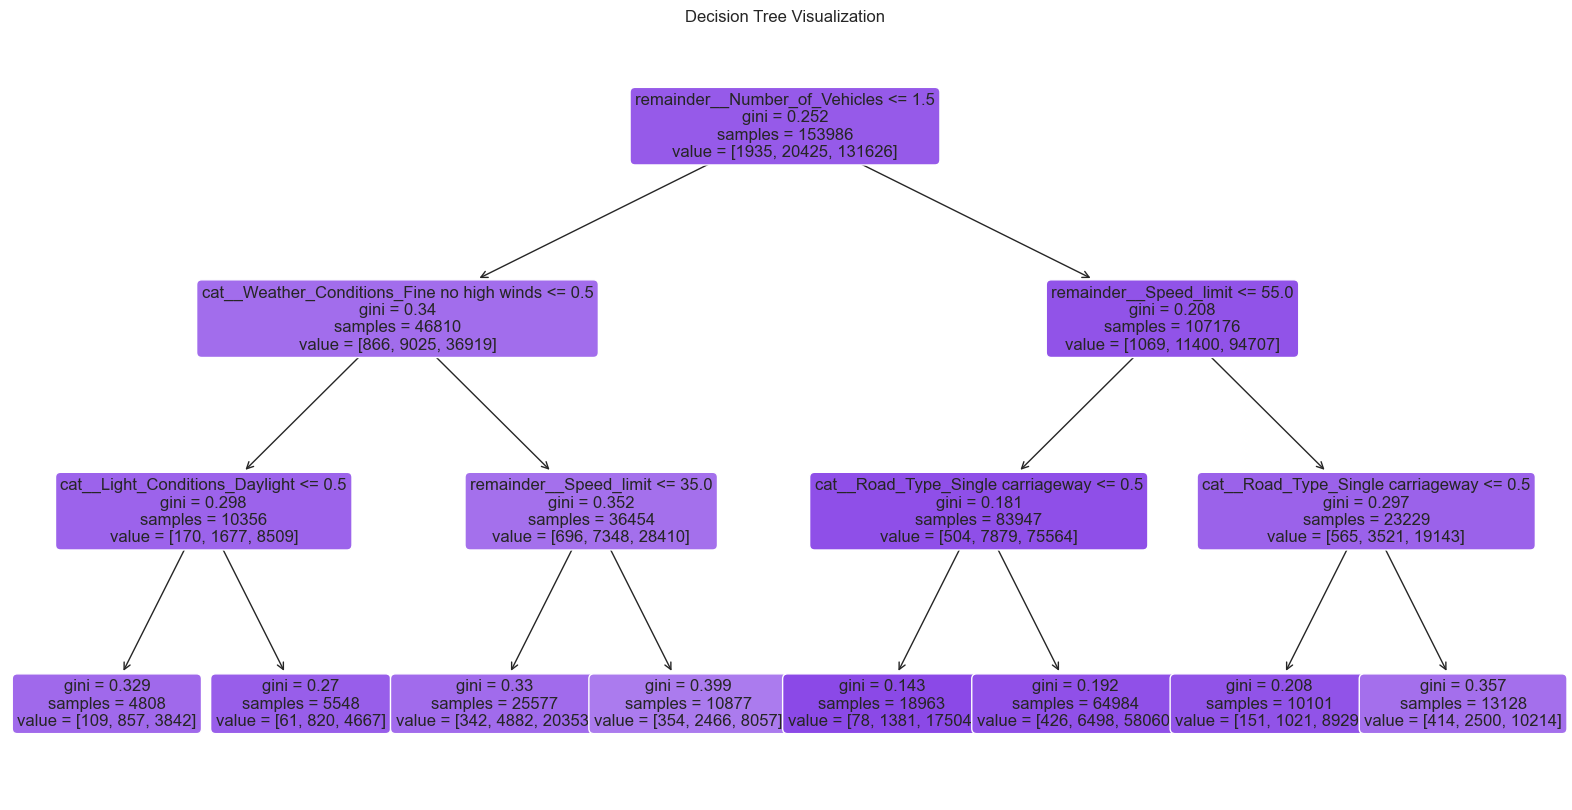

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y, test_size=TEST_SIZE, random_state=1) #Random state of one is being used to get reproduceable results
tree_model = DecisionTreeClassifier(max_depth=3) #verbose to monitor progress 
tree_model.fit(X_train, y_train)

#class_names = ['Serious', 'Fetal','Slight']
plt.figure(figsize=(20, 10))  # Set the size of the figure
plot_tree(tree_model, filled=True, feature_names=feature_names.tolist(), fontsize = 12, rounded = True)
plt.title('Decision Tree Visualization')
plt.show()


In [8]:
y_pred = tree_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

Accuracy: 0.854968276542825


C:\Users\noide\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\noide\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\noide\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
              precision    recall  f1-score   support

       Fatal       0.00      0.00      0.00      2018
     Serious       0.00      0.00      0.00     20315
      Slight       0.85      1.00      0.92    131654

    accuracy                           0.85    153987
   macro avg       0.28      0.33      0.31    153987
weighted avg       0.73      0.85      0.79    153987

Confusion Matrix:
[[     0      0   2018]
 [     0      0  20315]
 [     0      0 131654]]


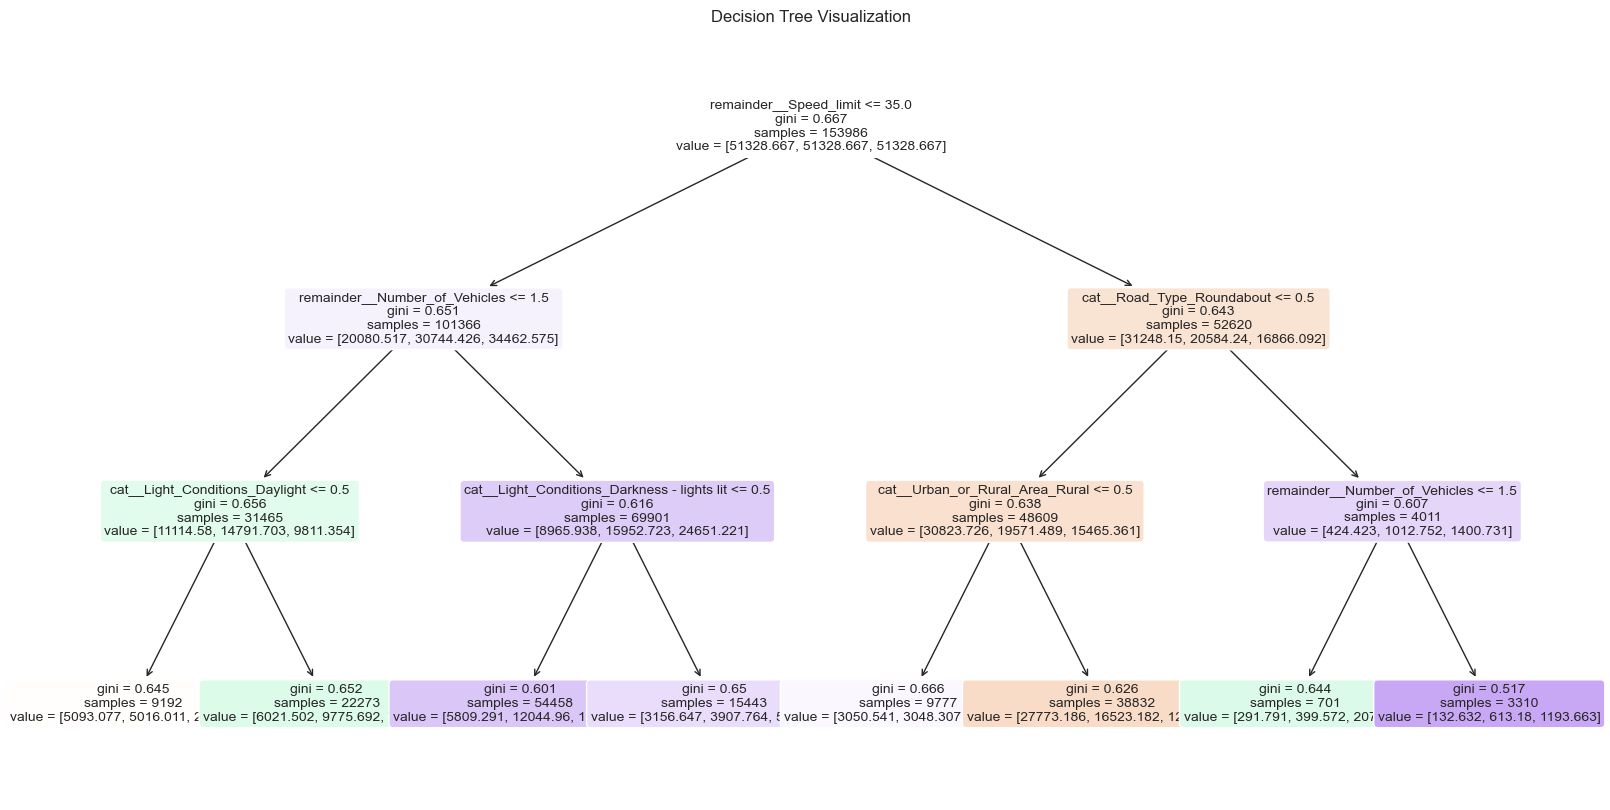

In [9]:
tree_model2 = DecisionTreeClassifier(max_depth=3,class_weight='balanced') #class_weight='balanced' to adjust weights inversely proportional to class frequencies
tree_model2.fit(X_train, y_train)

plt.figure(figsize=(20, 10))  # Set the size of the figure
plot_tree(tree_model2, filled=True, feature_names=feature_names.tolist(), fontsize = 10, rounded = True)
plt.title('Decision Tree Visualization')
plt.show()

In [10]:
y_pred2 = tree_model2.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred2)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred2)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred2)}")

Accuracy: 0.522427217882029
Classification Report:
              precision    recall  f1-score   support

       Fatal       0.03      0.63      0.05      2018
     Serious       0.18      0.20      0.19     20315
      Slight       0.90      0.57      0.70    131654

    accuracy                           0.52    153987
   macro avg       0.37      0.46      0.31    153987
weighted avg       0.79      0.52      0.62    153987

Confusion Matrix:
[[ 1264   247   507]
 [ 8597  3981  7737]
 [38204 18248 75202]]
